In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from aegomoku.gomoku_game import ConstantBoardInitializer, GomokuGame
from aegomoku.arena import Arena
from aegomoku.interfaces import MctsParams, PolicyParams
from aegomoku.gomoku_players import PolicyAdvisedGraphSearchPlayer

In [14]:
# The game is Gomoku on a 15x15 board
BOARD_SIZE = 15
cbi = ConstantBoardInitializer(stones='H8G7I7G9')
gomoku_15x15 = GomokuGame(board_size=BOARD_SIZE, initializer=cbi)

# Bobby Black, the freshly trained contender
mcts_bobby = MctsParams(cpuct=1.0, temperature=.01, num_simulations=200)
policy_bobby = PolicyParams(model_file_name="models/first_model.model", advice_cutoff=.2)
player1 = PolicyAdvisedGraphSearchPlayer("Bobby Black", gomoku_15x15, mcts_bobby, policy_bobby)

# Willy White, the heuristic champion
mcts_willy = MctsParams(cpuct=1.0, temperature=.2, num_simulations=200)
policy_willy = PolicyParams(model_file_name=None, advice_cutoff=.2)
player2 = PolicyAdvisedGraphSearchPlayer("Willy White", gomoku_15x15, mcts_willy, policy_willy)


arena = Arena(game=gomoku_15x15, player1=player1, player2=player2, max_moves=100)

In [15]:
arena.play_game(verbose=True)

Bobby Black to begin with black.
Bobby Black: G8
Willy White: F8
Bobby Black: I5
Willy White: E7
Bobby Black: H10
Willy White: F7
Bobby Black: D7
Willy White: F9
Bobby Black: F10
Willy White: H9
Bobby Black: I9
Willy White: E9
Bobby Black: D9
Willy White: D10
Bobby Black: C11
Willy White: H6
Willy White (white) won.


Willy White

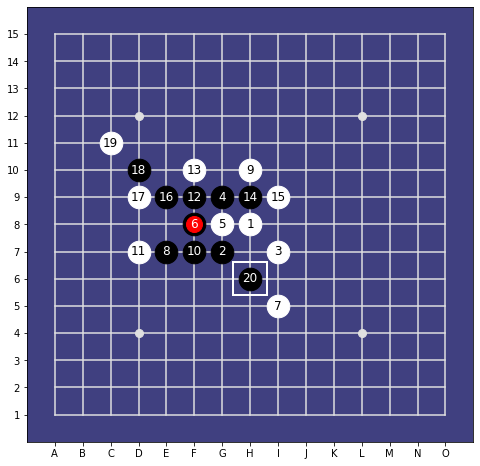

In [16]:
from aegomoku.policies.heuristic_policy import HeuristicPolicy
from aegomoku.utils import analyse_board
moves = [stone.i for stone in arena.board.stones]
heuristics = HeuristicPolicy(BOARD_SIZE, cut_off=0.1)
analyse_board(BOARD_SIZE, moves, heuristics)